<pre>
<center><b><h1>Project - 4</b></center>    
<center><b><h1>Credit Card Default</b></center>
<center><b><h2>Logistic Regression</b></center>
<pre>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_excel("Default1.xlsx")

In [ ]:
data

,Unnamed: 0,default,student,balance,income
0,1,No,Yes,729.526495,44361.625074
1,2,No,Yes,817.180407,12106.134700
2,3,No,No,1073.549164,31767.138947
3,4,No,No,529.250605,35704.493935
4,5,No,No,785.655883,38463.495879
...,...,...,...,...,...
9995,9996,No,No,711.555020,52992.378914
9996,9997,No,No,757.962918,19660.721768
9997,9998,No,No,845.411989,58636.156984
9998,9999,No,No,1569.009053,36669.112365


In [ ]:
data.head()

,Unnamed: 0,default,student,balance,income
0,1,No,Yes,729.526495,44361.625074
1,2,No,Yes,817.180407,12106.134700
2,3,No,No,1073.549164,31767.138947
3,4,No,No,529.250605,35704.493935
4,5,No,No,785.655883,38463.495879


In [ ]:
data.tail()

,Unnamed: 0,default,student,balance,income
9995,9996,No,No,711.555020,52992.378914
9996,9997,No,No,757.962918,19660.721768
9997,9998,No,No,845.411989,58636.156984
9998,9999,No,No,1569.009053,36669.112365
9999,10000,No,Yes,200.922183,16862.952321


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  10000 non-null  int64  
 1   default     10000 non-null  object 
 2   student     10000 non-null  object 
 3   balance     10000 non-null  float64
 4   income      10000 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 390.8+ KB


In [ ]:
data.describe(include='all')

,Unnamed: 0,default,student,balance,income
count,10000.00000,10000,10000,10000.000000,10000.000000
unique,NaN,2,2,NaN,NaN
top,NaN,No,No,NaN,NaN
freq,NaN,9667,7055,NaN,NaN
mean,5000.50000,NaN,NaN,835.374886,33516.981876
std,2886.89568,NaN,NaN,483.714985,13336.639563
min,1.00000,NaN,NaN,0.000000,771.967729
25%,2500.75000,NaN,NaN,481.731105,21340.462903
50%,5000.50000,NaN,NaN,823.636973,34552.644802
75%,7500.25000,NaN,NaN,1166.308386,43807.729272


In [ ]:
data.shape

(10000, 5)

In [ ]:
data.isnull().sum()

Unnamed: 0    0
default       0
student       0
balance       0
income        0
dtype: int64

In [ ]:
(data.balance==0).sum(axis=0)

499

In [ ]:
data.student.value_counts()

student
No     7055
Yes    2945
Name: count, dtype: int64

In [ ]:
data.default.value_counts()

default
No     9667
Yes     333
Name: count, dtype: int64

In [ ]:
data['default2'] = data.default.factorize()[0]

In [ ]:
data['student2'] = data.student.factorize()[0]

In [ ]:
data.head(3)

,Unnamed: 0,default,student,balance,income,default2,student2
0,1,No,Yes,729.526495,44361.625074,0,0
1,2,No,Yes,817.180407,12106.134700,0,0
2,3,No,No,1073.549164,31767.138947,0,1


In [ ]:
data_dfno = data[data.default2==0].sample(frac=0.15)

In [ ]:
data_dfyes = data[data.default2==1]

In [ ]:
data_df = pd.concat([data_dfno,data_dfyes],ignore_index=True)

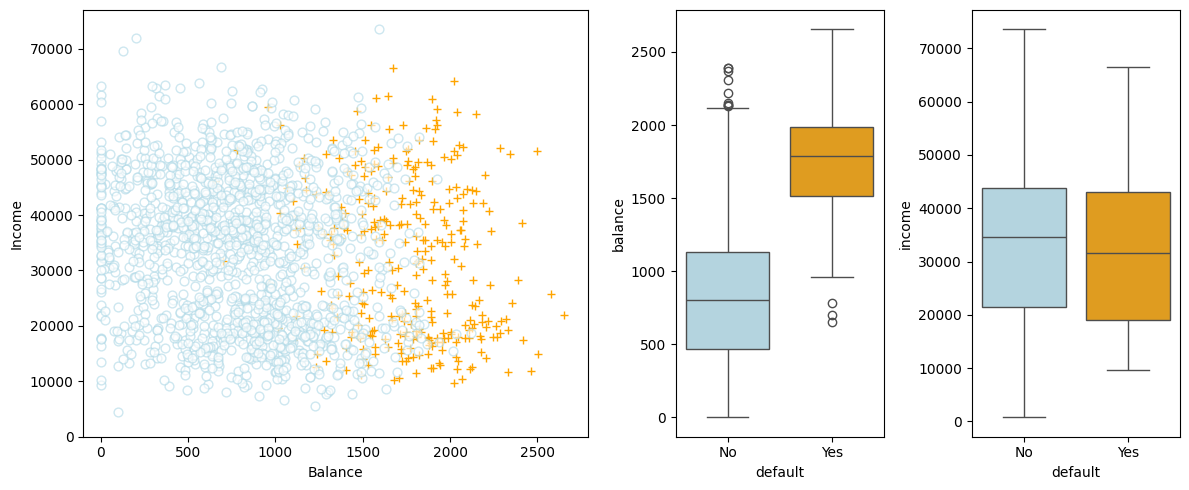

In [ ]:
fig = plt.figure(figsize=(12,5))
gs = mpl.gridspec.GridSpec(1,4)
ax1 = plt.subplot(gs[0,:2])

ax2 = plt.subplot(gs[0,2:3])
ax3 = plt.subplot(gs[0,3:4])
ax1.scatter(data_df[data_df.default=='Yes'].balance,data_df[data_df.default=='Yes'].income,s=40,c='orange',marker='+',linewidths=1)
ax1.scatter(data_df[data_df.default=='No'].balance,data_df[data_df.default=='No'].income,s=40,marker='o',linewidths=1,edgecolors='lightblue',facecolors='white',alpha=.6)
ax1.set_ylim(ymin=0)
ax1.set_ylabel('Income')
ax1.set_xlim(xmin=-100)
ax1.set_xlabel('Balance')
c_palette = {'No':'lightblue','Yes':'orange'}
sns.boxplot(x='default',y='balance',hue='default',data=data,orient='v',ax=ax2,palette=c_palette)
sns.boxplot(x='default',y='income',hue='default',data=data,orient='v',ax=ax3,palette=c_palette)
gs.tight_layout(plt.gcf())



In [ ]:
x_train=data.balance.values.reshape(-1,1)

In [ ]:
y=data.default2

In [ ]:
x_test=np.arange(data.balance.min(), data.balance.max()).reshape(-1,1)

In [ ]:
import sklearn.linear_model as skl_lm

In [ ]:
clf=skl_lm.LogisticRegression(solver="newton-cg")

In [ ]:
clf.fit(x_train,y)

LogisticRegression(solver='newton-cg')

In [ ]:
prob=clf.predict_proba(x_test)

In [ ]:
sns.regplot(x=data.balance, y=data.default2, order=1, ci=None,scatter_kws={'color':'orange'},line_kws={'color':'lightblue', 'lw':2}, ax=ax1)
ax2.scatter(x_train, y, color='orange')
ax2.plot(x_test, prob[:,1], color='lightblue')
for ax in fig.axes:
    ax.hlines(1, xmin=ax.xaxis.get_data_interval()[0],xmax=ax.xaxis.get_data_interval()[1], linestyles='dashed', lw=1)
    ax.hlines(0, xmin=ax.xaxis.get_data_interval()[0],xmax=ax.xaxis.get_data_interval()[1], linestyles='dashed', lw=1)
    ax.set_ylabel('Probability of default')
    ax.set_xlabel('Balance')

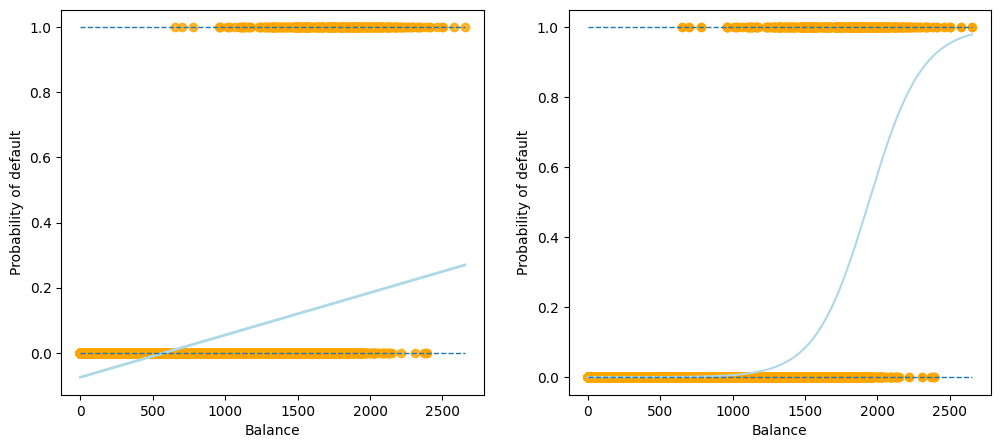

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))

sns.regplot(data=data, x='balance',y='default2', order=1, ci=None,scatter_kws ={'color': 'orange'},line_kws={'color':'lightblue', 'lw':2}, ax=ax1)

ax2.scatter(x_train, y, color='orange')

ax2.plot(x_test, prob[:,1], color='lightblue')

for ax in fig.axes:

    ax.hlines(1, xmin=ax.xaxis.get_data_interval()[0], xmax=ax.xaxis.get_data_interval()[1], linestyles='dashed', lw=1)

    ax.hlines(0, xmin=ax.xaxis.get_data_interval()[0],xmax=ax.xaxis.get_data_interval()[1], linestyles='dashed', lw=1)

    ax.set_ylabel('Probability of default')
    ax.set_xlabel('Balance')

    # ax.set_yticks(10, 0.25, 0.5, 0.75, 1)

    # ax.set_xlabel(xmin=-100)

In [ ]:
print(clf)

LogisticRegression(solver='newton-cg')


In [ ]:
print('classes: ',clf.classes_)

classes:  [0 1]


In [ ]:
print('coefficients: ',clf.coef_)

coefficients:  [[0.00542374]]


In [ ]:
print('intercept :', clf.intercept_)

intercept : [-10.52598837]


# Logistic Regression (X=Balance) Using statsmodel

In [ ]:

import statsmodels.api as sm

In [ ]:
import statsmodels.discrete.discrete_model as sms

In [ ]:
X_train = sm.add_constant(data.balance)

In [ ]:
est = sm.Logit(y.ravel(), X_train).fit()

In [ ]:
est.summary2().tables[1]

,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
const,-10.651331,0.361169,-29.491287,3.723665e-191,-11.359208,-9.943453
balance,0.005499,0.000220,24.952404,2.010855e-137,0.005067,0.005931


In [ ]:
X_train = sm.add_constant(data.student2)

In [ ]:
y = data.default2

In [ ]:
est = sms.Logit(y, X_train).fit()

Optimization terminated successfully.
         Current function value: 0.145436
         Iterations 7


In [ ]:
print(est.summary().tables[1].as_text())

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.0996      0.091    -34.169      0.000      -3.277      -2.922
student2      -0.4044      0.115     -3.516      0.000      -0.630      -0.179


<pre>
<center><b><h1>Project - 5</b></center>    
<center><b><h1>Credit Card Default</b></center>
<center><b><h2>Multiple Logistic Regression</b></center>
<pre>

In [ ]:
X_train = sm.add_constant(data[['balance', 'income', 'student2']])

In [ ]:
est = sms.Logit(y,X_train).fit()

Optimization terminated successfully.
         Current function value: 0.078577
         Iterations 10


In [ ]:
print(est.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.5158      0.438    -26.299      0.000     -12.374     -10.658
balance        0.0057      0.000     24.736      0.000       0.005       0.006
income      3.033e-06    8.2e-06      0.370      0.712    -1.3e-05    1.91e-05
student2       0.6468      0.236      2.738      0.006       0.184       1.110


# Confounding Variables

In [ ]:
X_train = data[data.student == 'Yes'].balance.values.reshape(-1,1)

In [ ]:
y = data[data.student == 'Yes'].default2

In [ ]:
X_train2 = data[data.student == 'No'].balance.values.reshape(-1,1)

In [ ]:
y2 = data[data.student == 'No'].default2

In [ ]:
X_test = np.arange(data.balance.min(),data.balance.max()).reshape(-1,1)

In [ ]:
clf = skl_lm.LogisticRegression(solver='newton-cg')

In [ ]:
clf2 = skl_lm.LogisticRegression(solver='newton-cg')

In [ ]:
clf.fit(X_train,y)

LogisticRegression(solver='newton-cg')

In [ ]:
clf2.fit(X_train2,y2)

LogisticRegression(solver='newton-cg')

In [ ]:
prob = clf.predict_proba(X_test)

In [ ]:
prob2 = clf2.predict_proba(X_test)

In [ ]:
data.groupby(['student','default']).size().unstack('default')

default,No,Yes
student,,
No,6849,206
Yes,2818,127


C:\Users\HimanshuKasundra\AppData\Local\Temp\ipykernel_3884\3237798449.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='student', y='balance',data=data, orient='v', ax=ax2, palette=c_palette);


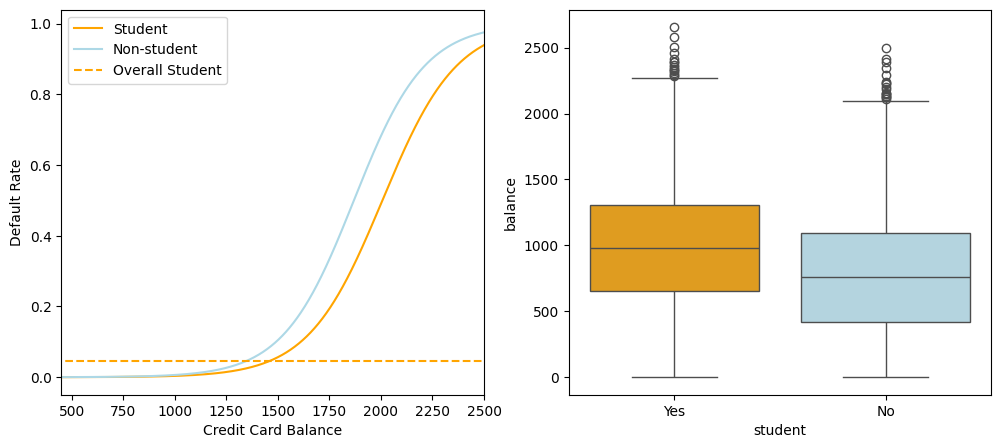

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
ax1.plot(X_test, prob[:,1], color='orange', label='Student')
ax1.plot(X_test, prob2[:,1], color='lightblue', label='Non-student')
ax1.hlines(127/2817, colors='orange', label='Overall Student',xmin=ax1.xaxis.get_data_interval()[0],xmax=ax1.xaxis.get_data_interval()[1],linestyles='dashed')
# ax1.hlines(206/6850, colors='lightblue')
ax1.set_ylabel('Default Rate')
ax1.set_xlabel('Credit Card Balance')
ax1.set_yticks([0, 0.2, 0.4, 0.6, 0.8,1.])
ax1.set_xlim(450,2500)
ax1.legend(loc=2)

# Right plot
sns.boxplot(x='student', y='balance',data=data, orient='v', ax=ax2, palette=c_palette);

<pre>
<center><b><h1>Project - 6</b></center>    
<center><b><h1>Credit Card Default</b></center>
<center><b><h2>Linear Discriminant Analysis</b></center>
<pre>

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
X = data[['balance', 'income', 'student2']]

In [ ]:
y = data.default2

In [ ]:
lda = LinearDiscriminantAnalysis(solver='svd')

In [ ]:
y_pred = lda.fit(X, y).predict(X)

In [ ]:
data_df = pd.DataFrame({'True default status': y, 'Predicted default status': y_pred})

In [ ]:
data_df.replace(to_replace={0:'No',1:'Yes'}, inplace=True)

In [ ]:
data_df.groupby(['Predicted default status','True default status']).size().unstack('True default status')

True default status,No,Yes
Predicted default status,,
No,9645,254
Yes,22,79


In [ ]:
decision_prob = 0.2
y_prob = lda.fit(X, y).predict_proba(X)

In [ ]:
data_df = pd.DataFrame({'True default status': y,'Predicted default status': y_prob[:,1] >decision_prob})

In [ ]:
data_df.replace(to_replace={0:'No', 1:'Yes','True':'Yes', 'False':'No '}, inplace=True)

In [ ]:
data_df.groupby(['Predicted default status','True default status']).size().unstack('True default status')

True default status,No,Yes
Predicted default status,,
False,9435,140
True,232,193
